In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, plot_roc_curve

In [2]:
df=pd.read_csv('/kaggle/input/rsna-breast-cancer-detection/sample_submission.csv')

In [3]:
df

,prediction_id,cancer
0,10008_L,0.021168
1,10008_R,0.021168


In [4]:
df_train = pd.read_csv('/kaggle/input/rsna-breast-cancer-detection/train.csv')
df_test = pd.read_csv('/kaggle/input/rsna-breast-cancer-detection/test.csv')

In [5]:
trainset_copy=df_train.copy()

In [6]:
df_train.head(5)

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [7]:
df_train.info() # gives insights such as column_label, non_null_values, column_datatypes etc..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54706 entries, 0 to 54705
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_id                  54706 non-null  int64  
 1   patient_id               54706 non-null  int64  
 2   image_id                 54706 non-null  int64  
 3   laterality               54706 non-null  object 
 4   view                     54706 non-null  object 
 5   age                      54669 non-null  float64
 6   cancer                   54706 non-null  int64  
 7   biopsy                   54706 non-null  int64  
 8   invasive                 54706 non-null  int64  
 9   BIRADS                   26286 non-null  float64
 10  implant                  54706 non-null  int64  
 11  density                  29470 non-null  object 
 12  machine_id               54706 non-null  int64  
 13  difficult_negative_case  54706 non-null  bool   
dtypes: bool(1), float64(2)

In [8]:
df_train.describe() # computes and display the statistical summary of our data

,site_id,patient_id,image_id,age,cancer,biopsy,invasive,BIRADS,implant,machine_id
count,54706.000000,54706.000000,5.470600e+04,54669.000000,54706.000000,54706.000000,54706.000000,26286.000000,54706.000000,54706.000000
mean,1.460407,32698.865262,1.079386e+09,58.543928,0.021168,0.054272,0.014953,0.772350,0.026999,54.618378
std,0.498434,18893.861534,6.183269e+08,10.050884,0.143944,0.226556,0.121365,0.590062,0.162081,44.784800
min,1.000000,5.000000,6.849100e+04,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,1.000000,16481.000000,5.458153e+08,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
50%,1.000000,32432.000000,1.082689e+09,59.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
75%,2.000000,48999.000000,1.613228e+09,66.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
max,2.000000,65534.000000,2.147472e+09,89.000000,1.000000,1.000000,1.000000,2.000000,1.000000,216.000000


# DATA CLEANING


In [9]:
# finding unique elements in the column 'laterality' 
df_train['laterality'].unique()

array(['L', 'R'], dtype=object)

In [10]:
# finding unique elements in the column view 
df_train['view'].unique()

array(['CC', 'MLO', 'ML', 'LM', 'AT', 'LMO'], dtype=object)

In [11]:
# finding unique elements in the column 'difficult_negative_case'
df_train['difficult_negative_case'].unique()

array([False,  True])

In [12]:
# finding unique elements in the column 'Survived' 
df_train['cancer'].unique()

array([0, 1])

In [13]:
# check for duplicate entries
df_train.duplicated().sum()

0

In [14]:
# X= df_train.drop('cancer', axis=1)
# y = df['cancer']

In [15]:
# checking for total null values
df_train.isnull().sum()

site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                           37
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28420
implant                        0
density                    25236
machine_id                     0
difficult_negative_case        0
dtype: int64

In [16]:
# drop unwanted columns
df_train.drop(['BIRADS','density','biopsy','invasive','difficult_negative_case'],axis=1,inplace=True)
df_train.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,implant,machine_id
0,2,10006,462822612,L,CC,61.0,0,0,29
1,2,10006,1459541791,L,MLO,61.0,0,0,29
2,2,10006,1864590858,R,MLO,61.0,0,0,29
3,2,10006,1874946579,R,CC,61.0,0,0,29
4,2,10011,220375232,L,CC,55.0,0,0,21


In [17]:
# filling missing values for the column 'Age'
df_train['age']=df_train['age'].fillna(value=df_train['age'].mean())

In [18]:
df_train.isnull().sum()

site_id       0
patient_id    0
image_id      0
laterality    0
view          0
age           0
cancer        0
implant       0
machine_id    0
dtype: int64

In [19]:
# get_dummies is used to convert categorical data into dummy or indicator variable
S=df_train.laterality
dummy=pd.get_dummies(S)
dummy.head()

,L,R
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0


In [20]:
df_train=pd.concat([dummy,df_train],axis=1)
df_train.head()

,L,R,site_id,patient_id,image_id,laterality,view,age,cancer,implant,machine_id
0,1,0,2,10006,462822612,L,CC,61.0,0,0,29
1,1,0,2,10006,1459541791,L,MLO,61.0,0,0,29
2,0,1,2,10006,1864590858,R,MLO,61.0,0,0,29
3,0,1,2,10006,1874946579,R,CC,61.0,0,0,29
4,1,0,2,10011,220375232,L,CC,55.0,0,0,21


In [21]:
df_train.drop(['laterality'],axis=1,inplace=True)
df_train.head()

,L,R,site_id,patient_id,image_id,view,age,cancer,implant,machine_id
0,1,0,2,10006,462822612,CC,61.0,0,0,29
1,1,0,2,10006,1459541791,MLO,61.0,0,0,29
2,0,1,2,10006,1864590858,MLO,61.0,0,0,29
3,0,1,2,10006,1874946579,CC,61.0,0,0,29
4,1,0,2,10011,220375232,CC,55.0,0,0,21


In [22]:
E=df_train.view
dummies=pd.get_dummies(E)
dummies.head()

,AT,CC,LM,LMO,ML,MLO
0,0,1,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [23]:
df_train.drop(['view'],axis=1,inplace=True)

In [24]:
df_train=pd.concat([dummies,df_train],axis=1)
df_train.head()

,AT,CC,LM,LMO,ML,MLO,L,R,site_id,patient_id,image_id,age,cancer,implant,machine_id
0,0,1,0,0,0,0,1,0,2,10006,462822612,61.0,0,0,29
1,0,0,0,0,0,1,1,0,2,10006,1459541791,61.0,0,0,29
2,0,0,0,0,0,1,0,1,2,10006,1864590858,61.0,0,0,29
3,0,1,0,0,0,0,0,1,2,10006,1874946579,61.0,0,0,29
4,0,1,0,0,0,0,1,0,2,10011,220375232,55.0,0,0,21


In [25]:
df_train.describe()

,AT,CC,LM,LMO,ML,MLO,L,R,site_id,patient_id,image_id,age,cancer,implant,machine_id
count,54706.000000,54706.000000,54706.000000,54706.000000,54706.000000,54706.000000,54706.000000,54706.000000,54706.000000,54706.000000,5.470600e+04,54706.000000,54706.000000,54706.000000,54706.000000
mean,0.000347,0.489252,0.000183,0.000018,0.000146,0.510054,0.498428,0.501572,1.460407,32698.865262,1.079386e+09,58.543928,0.021168,0.026999,54.618378
std,0.018633,0.499889,0.013519,0.004275,0.012092,0.499903,0.500002,0.500002,0.498434,18893.861534,6.183269e+08,10.047484,0.143944,0.162081,44.784800
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,6.849100e+04,26.000000,0.000000,0.000000,21.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,16481.000000,5.458153e+08,51.000000,0.000000,0.000000,29.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,32432.000000,1.082689e+09,59.000000,0.000000,0.000000,49.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,48999.000000,1.613228e+09,66.000000,0.000000,0.000000,49.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,65534.000000,2.147472e+09,89.000000,1.000000,1.000000,216.000000


<AxesSubplot:xlabel='cancer', ylabel='count'>

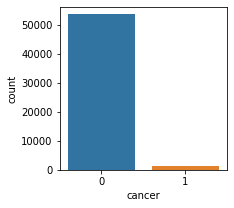

In [26]:
plt.figure(figsize=(3,3))
sns.countplot(x='cancer',data=df_train)

In [27]:
X_train=df_train.drop(['cancer'],axis=1)

In [28]:
y_train=df_train.cancer

TEST DATA ANALYSIS

In [29]:
df_test.head()

,site_id,patient_id,image_id,laterality,view,age,implant,machine_id,prediction_id
0,2,10008,736471439,L,MLO,81,0,21,10008_L
1,2,10008,1591370361,L,CC,81,0,21,10008_L
2,2,10008,68070693,R,MLO,81,0,21,10008_R
3,2,10008,361203119,R,CC,81,0,21,10008_R


In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   site_id        4 non-null      int64 
 1   patient_id     4 non-null      int64 
 2   image_id       4 non-null      int64 
 3   laterality     4 non-null      object
 4   view           4 non-null      object
 5   age            4 non-null      int64 
 6   implant        4 non-null      int64 
 7   machine_id     4 non-null      int64 
 8   prediction_id  4 non-null      object
dtypes: int64(6), object(3)
memory usage: 416.0+ bytes


In [31]:
# checking for duplicates
df_test.duplicated().sum()

0

In [32]:
# checking for null values
df_test.isnull().sum()

site_id          0
patient_id       0
image_id         0
laterality       0
view             0
age              0
implant          0
machine_id       0
prediction_id    0
dtype: int64

In [33]:
# # dropping unwanted columns
# df_test.drop(columns=['prediction_id'],axis=1,inplace=True)
# df_test.head()

In [34]:
S1=df_test.laterality
dummy1=pd.get_dummies(S1)
dummy1.head()

,L,R
0,1,0
1,1,0
2,0,1
3,0,1


In [35]:
df_test=pd.concat([dummy1,df_test],axis=1)
df_test.head()

,L,R,site_id,patient_id,image_id,laterality,view,age,implant,machine_id,prediction_id
0,1,0,2,10008,736471439,L,MLO,81,0,21,10008_L
1,1,0,2,10008,1591370361,L,CC,81,0,21,10008_L
2,0,1,2,10008,68070693,R,MLO,81,0,21,10008_R
3,0,1,2,10008,361203119,R,CC,81,0,21,10008_R


In [36]:
df_test.drop(['laterality'],axis=1,inplace=True)

In [37]:
E1=df_test.view
dummy2=pd.get_dummies(E1)
dummy2.head()

,CC,MLO
0,0,1
1,1,0
2,0,1
3,1,0


In [38]:
df_test=pd.concat([dummy2,df_test],axis=1)

In [39]:
df_test.drop(['view'],axis=1,inplace=True)

In [40]:
df_test.head()

,CC,MLO,L,R,site_id,patient_id,image_id,age,implant,machine_id,prediction_id
0,0,1,1,0,2,10008,736471439,81,0,21,10008_L
1,1,0,1,0,2,10008,1591370361,81,0,21,10008_L
2,0,1,0,1,2,10008,68070693,81,0,21,10008_R
3,1,0,0,1,2,10008,361203119,81,0,21,10008_R


In [41]:
from sklearn.ensemble import RandomForestClassifier
features=['CC','MLO', 'L', 'R', 'site_id', 'patient_id',
       'image_id', 'age','implant', 'machine_id']
X=pd.get_dummies(df_train[features])
y=df_train['cancer']

X_test=pd.get_dummies(df_test[features])
model=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=2)
model.fit(X,y)
prediction = model.predict(X_test)
result=pd.DataFrame({'prediction_id':df_test.prediction_id,'cancer':prediction})

In [43]:
result.to_csv('submission.csv',index=False)